

## 1.  Data ETL

### 1.1 Data Loading

Load weblog files from Google Drive into a Pandas dataframe and monitor number of files processed

In [2]:
# To access files on Google Drive
from google.colab import drive

drive.mount('/content/drive') 

Mounted at /content/drive


In [6]:
# Location of the tar file on Google Drive
file_name = '/content/drive/MyDrive/weblog.tar.gz'

In [9]:
!tar -tzf $file_name

weblog/
weblog/ex061102.log
weblog/ex061103.log
weblog/ex061104.log
weblog/ex061105.log
weblog/ex061101.log


In [10]:
import tarfile
import pandas as pd

# Empty list to hold dataframe for each file
data = []

# Variable to store number of files processed 
filecount = 0

# Define column headers
col_names=['date','time','s-sitename','s-ip','cs-method','cs-uri-stem',
           'cs-uri-query','s-port','cs-username', 'c-ip','cs(User-Agent)',
           'cs(Referer)','sc-status','sc-substatus','sc-win32-status']

with tarfile.open(file_name) as tar:
  for logfile in [n for n in tar.getnames() if n.endswith('.log')]:
    print('Processing: ', logfile)
    df = pd.read_csv(tar.extractfile(logfile), 
                     delim_whitespace=True, # fields are space delimited
                     comment= '#', # To remove 4 info lines at top of logfile
                     header = None, # Header has extra 'Fields:' column
                     na_values='-', # NA columns are marked with - in logfile
                     names=col_names, # Set column headers
                     error_bad_lines=False, encoding = 'iso-8859-1')
    data.append(df)
    filecount+= 1

# Cleanup
del(df)

print('Number of files processed: ', filecount)

# Concatenate all dataframes in the list into a single dataframe
df_web = pd.concat(data)

Processing:  weblog/ex061102.log
Processing:  weblog/ex061103.log
Processing:  weblog/ex061104.log
Processing:  weblog/ex061105.log
Processing:  weblog/ex061101.log
Number of files processed:  5


In [11]:
# View 5 rows of the data
df_web.head()

,date,time,s-sitename,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status
0,2006-11-02,00:00:08,W3SVC1,127.0.0.1,GET,/Default.aspx,NaN,80,NaN,59.188.33.66,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,NaN,200.0,0.0,0.0
1,2006-11-02,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/home/en-us/home_index.aspx,NaN,80,NaN,59.188.33.66,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,NaN,200.0,0.0,0.0
2,2006-11-02,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/common/common_style.aspx,lang=en-us,80,NaN,59.188.33.66,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200.0,0.0,0.0
3,2006-11-02,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/includes/js/CommonUtil.js,NaN,80,NaN,59.188.33.66,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200.0,0.0,0.0
4,2006-11-02,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/top_logo.gif,NaN,80,NaN,59.188.33.66,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200.0,0.0,0.0


In [12]:
# View data types and total rows for the dataframe
df_web.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295612 entries, 0 to 77462
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   date             295612 non-null  object 
 1   time             295612 non-null  object 
 2   s-sitename       295612 non-null  object 
 3   s-ip             295612 non-null  object 
 4   cs-method        295612 non-null  object 
 5   cs-uri-stem      295612 non-null  object 
 6   cs-uri-query     18883 non-null   object 
 7   s-port           295612 non-null  int64  
 8   cs-username      0 non-null       float64
 9   c-ip             295612 non-null  object 
 10  cs(User-Agent)   295554 non-null  object 
 11  cs(Referer)      238989 non-null  object 
 12  sc-status        295439 non-null  float64
 13  sc-substatus     295439 non-null  float64
 14  sc-win32-status  295439 non-null  float64
dtypes: float64(4), int64(1), object(10)
memory usage: 36.1+ MB


### 1.2 Data Cleaning

Remove columns with > 15% NAs then remove remaining records with any NAs.

In [13]:
# Find NAs in each column
df_web.isna().sum()

date                    0
time                    0
s-sitename              0
s-ip                    0
cs-method               0
cs-uri-stem             0
cs-uri-query       276729
s-port                  0
cs-username        295612
c-ip                    0
cs(User-Agent)         58
cs(Referer)         56623
sc-status             173
sc-substatus          173
sc-win32-status       173
dtype: int64

In [17]:
# Find % of NAs in each column
round(df_web.isna().sum()/len(df_web) * 100)

date                 0.0
time                 0.0
s-sitename           0.0
s-ip                 0.0
cs-method            0.0
cs-uri-stem          0.0
cs-uri-query        94.0
s-port               0.0
cs-username        100.0
c-ip                 0.0
cs(User-Agent)       0.0
cs(Referer)         19.0
sc-status            0.0
sc-substatus         0.0
sc-win32-status      0.0
dtype: float64

The following columns have a high percentage of NAs and need to be dropped:
 
*   cs-uri-query        94%
*   cs-username        100%
*   cs(Referer)          19%

In [19]:
# Drop 3 columns with > 15% NAs
df_web = df_web.drop(['cs-uri-query', 'cs-username', 'cs(Referer)'], axis=1)
df_web.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295612 entries, 0 to 77462
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   date             295612 non-null  object 
 1   time             295612 non-null  object 
 2   s-sitename       295612 non-null  object 
 3   s-ip             295612 non-null  object 
 4   cs-method        295612 non-null  object 
 5   cs-uri-stem      295612 non-null  object 
 6   s-port           295612 non-null  int64  
 7   c-ip             295612 non-null  object 
 8   cs(User-Agent)   295554 non-null  object 
 9   sc-status        295439 non-null  float64
 10  sc-substatus     295439 non-null  float64
 11  sc-win32-status  295439 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 29.3+ MB


Drop remaining rows containing NAs.

In [23]:
# Drop rows with NAs
df_web.dropna(axis=0, how= 'any', inplace= True)

In [24]:
# Find updated number of NAs in each column
df_web.isna().sum()

date               0
time               0
s-sitename         0
s-ip               0
cs-method          0
cs-uri-stem        0
s-port             0
c-ip               0
cs(User-Agent)     0
sc-status          0
sc-substatus       0
sc-win32-status    0
dtype: int64

In [25]:
# Updated data counts
df_web.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295381 entries, 0 to 77462
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   date             295381 non-null  object 
 1   time             295381 non-null  object 
 2   s-sitename       295381 non-null  object 
 3   s-ip             295381 non-null  object 
 4   cs-method        295381 non-null  object 
 5   cs-uri-stem      295381 non-null  object 
 6   s-port           295381 non-null  int64  
 7   c-ip             295381 non-null  object 
 8   cs(User-Agent)   295381 non-null  object 
 9   sc-status        295381 non-null  float64
 10  sc-substatus     295381 non-null  float64
 11  sc-win32-status  295381 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 29.3+ MB


Data has been cleaned.  Number of rows remaining is 295,381 

## 2. Data Analysis

In [27]:
import matplotlib.pyplot as plt

### 2.1 Traffic Analysis

Group web requests by hour and day to determine hourly traffic trends.

In [26]:
# Group number of requests by hour of day

# Create a new column with the hour values e.g., 00, 01, 02, .., 23
df_web['hour'] = df_web['time'].str.slice(0, 2)

# Count number of requests by hour
hour_distr = df_web['hour'].value_counts().sort_index()
hour_distr

00     6010
01    12559
02    15310
03    17229
04    15802
05    16170
06    21819
07    19491
08    21260
09    18499
10    13523
11    11316
12    11404
13    14732
14    15328
15    18117
16    13889
17    10641
18     7415
19     3505
20     2936
21     2220
22     2352
23     3854
Name: hour, dtype: int64

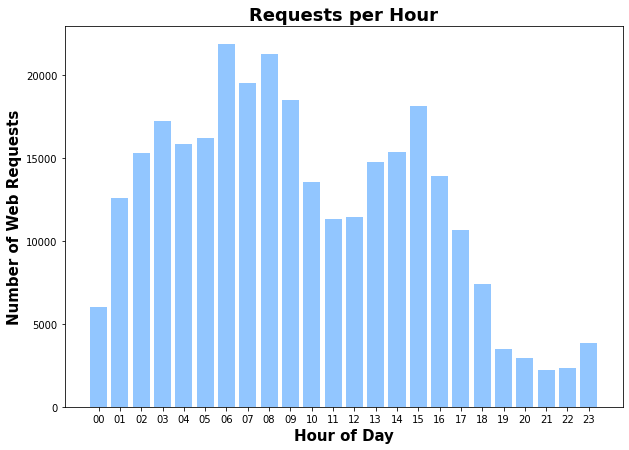

In [28]:
# Create a bar chart of the web traffic distribution by hour
%matplotlib inline

plt.style.use('seaborn-pastel')

# Figure Size
fig = plt.figure(figsize =(10, 7))

plt.bar(hour_distr.index, hour_distr.values)
plt.xlabel('Hour of Day', fontweight ='bold', fontsize = 15)
plt.ylabel('Number of Web Requests', fontweight ='bold', fontsize = 15)
plt.title('Requests per Hour', fontweight ='bold', fontsize = 18)
plt.show()

In [31]:
# Group number of requests by hour and day

# Create a new column with the date and hour values e.g., 2006-11-0100, 2006-11-0101, 2006-11-0102, ..
df_web['date_hour'] = df_web.date.str.cat(df_web.hour)

# Count number of requests by date and hour
date_hour_distr = df_web['date_hour'].value_counts().sort_index()
date_hour_distr

2006-11-0100    1612
2006-11-0101    2385
2006-11-0102    2998
2006-11-0103    2810
2006-11-0104    3262
                ... 
2006-11-0519     966
2006-11-0520     426
2006-11-0521     265
2006-11-0522     186
2006-11-0523     404
Name: date_hour, Length: 120, dtype: int64

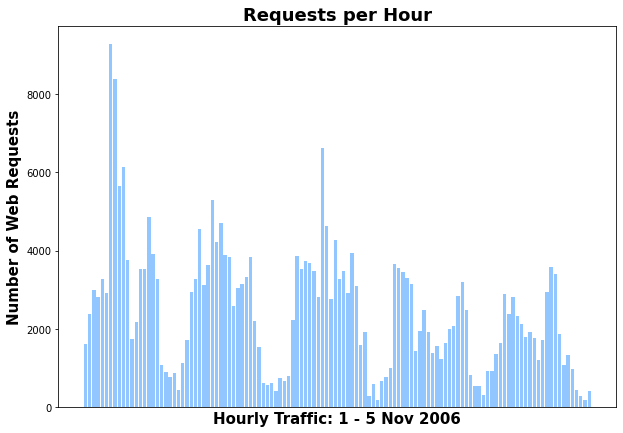

In [43]:
# Create a bar chart of the web traffic distribution by date and hour
%matplotlib inline

plt.style.use('seaborn-pastel')

# Figure Size
fig = plt.figure(figsize =(10, 7))

plt.bar(date_hour_distr.index, date_hour_distr.values)
plt.xlabel('Hourly Traffic: 1 - 5 Nov 2006', fontweight ='bold', fontsize = 15)
plt.xticks([])
plt.ylabel('Number of Web Requests', fontweight ='bold', fontsize = 15)
plt.title('Requests per Hour', fontweight ='bold', fontsize = 18)
plt.show()

In [45]:
# Filter for times with traffic above 5000 requests per hour
df_5k = date_hour_distr[(date_hour_distr >= 5000)].sort_index().reset_index()
df_5k.columns = ['Date_Hour', 'Traffic']
df_5k

,Date_Hour,Traffic
0,2006-11-0106,9278
1,2006-11-0107,8381
2,2006-11-0108,5655
3,2006-11-0109,6142
4,2006-11-0206,5291
5,2006-11-0308,6633


In [74]:
# Filter for times with traffic below 200 requests per hour
df_low = date_hour_distr[(date_hour_distr < 200)].sort_index().reset_index()
df_low.columns = ['Date_Hour', 'Traffic']
df_low

,Date_Hour,Traffic
0,2006-11-0321,171
1,2006-11-0522,186


In [70]:
# Find least request in an hour

print('Least request per hour is', date_hour_distr.min(), 'at', date_hour_distr.idxmin())

Least request per hour is 171 at 2006-11-0321


### 2.2 Server Analysis

View server responses breakdown using the sc-status column.

In [46]:
df_web['sc-status'] = df_web['sc-status'].astype(int)

# Group number of requests by server code status
srv_code_distr = df_web['sc-status'].value_counts()
srv_code_distr

200    214680
304     73165
404      5019
206      2151
302       219
500       101
301        21
501        11
403        11
406         2
400         1
Name: sc-status, dtype: int64

In [47]:
# how many types of status reported?
len(srv_code_distr)

11

In [ ]:
# list all server status codes
srv_code_distr.index.sort_values()

Int64Index([200, 206, 301, 302, 304, 400, 403, 404, 406, 416, 500, 501], dtype='int64')

In [48]:
# only a few status codes are returned frequently 
# the remaining codes happen only make up a small percentage
# save data into a dict for extraction into 'other' category
sc_dict = srv_code_distr.to_dict()

# separate the frequent codes 
big_slice = { k:v for (k,v) in sc_dict.items() if v >= 1000 }
big_slice

{200: 214680, 206: 2151, 304: 73165, 404: 5019}

In [49]:
# collect the remaining codes into the 'other' category
other_slice = { k:v for (k,v) in sc_dict.items() if v < 1000 }
other_slice

{301: 21, 302: 219, 400: 1, 403: 11, 406: 2, 500: 101, 501: 11}

In [50]:
# add the 'other' category into the big_slice dict
big_slice['other'] =  sum(other_slice.values())
big_slice

{200: 214680, 206: 2151, 304: 73165, 404: 5019, 'other': 366}

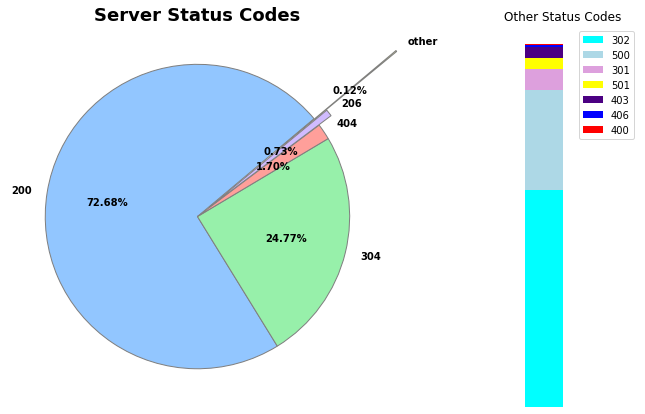

In [60]:
# Create a pie chart of the Server Response Code distribution
%matplotlib inline

# create a figure with 2 side by side plots
fig, (ax1, ax2) = plt.subplots(nrows= 1, ncols= 2, figsize=(12, 7),
                               gridspec_kw={'width_ratios': [3, 1]})

# Pie chart
# explode the wedge for the smallest values
explode = [0, 0, 0, 0.1, 0.7]
# line properties
wedge_props = {'linewidth': 1, 'edgecolor': 'gray'}
# set pie chart text to bold 
text_props = {'weight': 'bold'}
ax1.pie(big_slice.values(), autopct='%.2f%%', labels=big_slice.keys(), 
        explode = explode, wedgeprops=wedge_props, 
        startangle=40, textprops=text_props)
ax1.set_title('Server Status Codes', fontdict= {'fontweight': 'bold', 'fontsize': 18})

# Other bar
xpos = 0
bottom = 0
width = 2
colors = ['aqua', 'lightblue', 'plum', 'yellow', 'indigo', 'blue', 'red']
for i, (k,v) in enumerate(other_slice.items()):
    height = v
    ax2.bar(xpos, height, width, bottom=bottom, color= colors[i] )
    bottom += height

ax2.set_title('Other Status Codes')
ax2.legend(other_slice.keys())
ax2.axis('off')
ax2.set_xlim(- 1.5 * width, 2.5 * width)

plt.show()

### 2.3 Geographic Analysis

Use **DbIpCity** from **ip2geotools** to find the geolocation information from given IPs for a single hour - 3rd Nov 2006 9pm.

In [76]:
# discard the stdout stream for this cell
%%capture  
!pip install ip2geotools

#### 2.3.1 Requests by Country

In [78]:
# Extract records for 3rd Nov 2006 21:00 - 21:59
df_03Nov_9pm = df_web[(df_web['date_hour'] == '2006-11-0321')]

# How many records?
print(len(df_03Nov_9pm.index))

171


There are 171 requests in total.

Pass the IP Address for each row of data to DbIpCity.get().country method to extract source country for the IP Address. Store the Country information in a new column in the dataframe

In [77]:
from ip2geotools.databases.noncommercial import DbIpCity

# for each row, lookup the country information using IP Address
df_03Nov_9pm['country'] = df_03Nov_9pm.loc[:, 'c-ip'].apply(lambda x: DbIpCity.get(x, api_key='free').country)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [79]:
# Get distribution of requests by Country 
country_distr = df_03Nov_9pm['country'].value_counts()
country_distr

US    65
CA    65
MX    32
HK     6
CN     2
TW     1
Name: country, dtype: int64

In [80]:
# Verify the sum of requests by countries matches number of rows in df 
country_distr.sum()

171

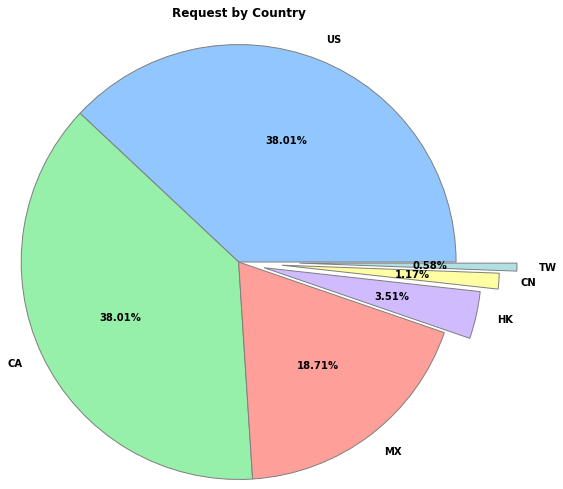

In [81]:
# Create a pie chart of the country distribution
%matplotlib inline

plt.style.use('seaborn-pastel')

# explode the wedge for the smallest values
explode = [0, 0, 0, 0.3, 0.5, 0.7]
# line properties
wedge_props = {'linewidth': 1, 'edgecolor': 'gray'}
# text properties
text_props = {'weight': 'bold'}
plt.pie(country_distr.values, labels=country_distr.index, 
        autopct='%.2f%%', explode=explode,
        wedgeprops=wedge_props, textprops=text_props,
        radius = 2.5)
plt.title('Request by Country', y = 1.6, 
          fontdict= {'fontweight': 'bold'})
plt.show()

#### 2.3.2 Requests by City

In [82]:
# discard the stdout stream for this cell
%%capture
# for each row, lookup the city information using IP Address
df_03Nov_9pm['city'] = df_03Nov_9pm.loc[:, 'c-ip'].apply(lambda x: DbIpCity.get(x, api_key='free').city)

In [83]:
# Get distribution of requests by Cityy 
city_distr = df_03Nov_9pm['city'].value_counts()
print(city_distr)

Montreal East                                  65
Mexico City (Miguel Hidalgo Villa Olímpica)    32
Columbus (Uptown District)                     31
Columbus                                       24
Hong Kong                                       6
Miami                                           5
New York                                        3
Beijing                                         2
Cheyenne                                        1
Mountain View                                   1
Taipei                                          1
Name: city, dtype: int64


In [84]:
# Verify the sum of requests by cities matches number of rows in df 
city_distr.sum()

171

In [85]:
# how many origin cities
len(city_distr)

11

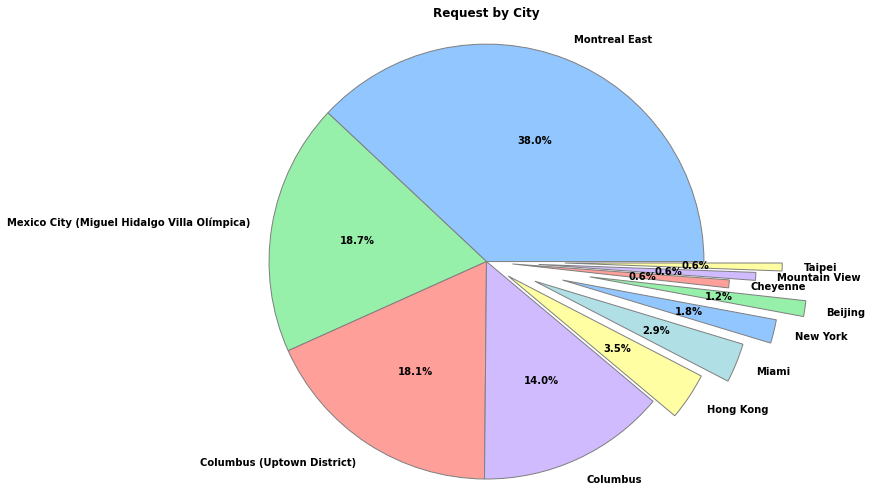

In [86]:
# Create a pie chart of the city distribution
plt.style.use('seaborn-pastel')

# explode the wedge for the smallest values
explode = [0, 0, 0, 0, 0.3, 0.6, 0.9, 1.2, 0.3, 0.6, 0.9]
plt.pie(city_distr.values, labels=city_distr.index, 
        autopct='%1.1f%%', explode=explode,
        wedgeprops=wedge_props, textprops=text_props,
        radius = 2.5)
plt.title('Request by City', 
          y = 1.6, 
          fontdict= {'fontweight': 'bold'})
plt.show()

In [ ]:
# Get top 3 cities by number of request. 
# Since the series is already sorted, use head()
city_distr.head(3)

Ha Kwai Chung    166
Beijing           15
New York          14
Name: city, dtype: int64

In [87]:
# View request distribution  by country and city
df_03Nov_9pm.groupby(['country', 'city']).size().reset_index(name='count')

,country,city,count
0,CA,Montreal East,65
1,CN,Beijing,2
2,HK,Hong Kong,6
3,MX,Mexico City (Miguel Hidalgo Villa Olímpica),32
4,TW,Taipei,1
5,US,Cheyenne,1
6,US,Columbus,24
7,US,Columbus (Uptown District),31
8,US,Miami,5
9,US,Mountain View,1
